**Trabajo de Fin de Grado**
- Autor: Pablo González Martín  
- Director: Carlos Javier Pérez González 

Grado en Matemáticas  
Universidad de La Laguna  
2024/25

Este notebook forma parte del Trabajo de Fin de Grado titulado *“Fundamentos de las redes neuronales
convolucionales y su aplicación en la
detección de enfermedades oculares”*, cuyo objetivo es desarrollar un modelo de clasificación de enfermedades oculares a partir de imágenes médicas.

En este notebook se realizan pruebas de eficiencia entre el uso de **GPU** vs **CPU** a la hora de entrenar modelos de redes neuronales de análisis y clasificación de imágenes.


Para ejecutar este notebook en una máquina local será necesario incorporar el uso de la GPU (que no es automático en versiones recientes de Tensorflow). Se recomienda usar Google Colab o directamente descargar los resultados en formato imagen presentes en el directorio base.

- cpu_vs_gpu_benchmark_barras

- cpu_vs_gpu_benchmark



(How to Setup NVIDIA GPU For Deep Learning | Installing Cuda Toolkit And cuDNN)
https://www.youtube.com/watch?v=nATRPPZ5dGE

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2025-04-22 14:19:09.992272: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745327950.142503    2040 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745327950.181564    2040 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745327950.507533    2040 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745327950.507570    2040 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745327950.507572    2040 computation_placer.cc:177] computation placer alr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2025-04-21 22:50:00.464305: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745272200.481973   13203 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745272200.487154   13203 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745272200.525864   13203 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745272200.525894   13203 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745272200.525895   13203 computation_placer.cc:177] computation placer alr


Ejecutando benchmark con 1000 muestras y 1 épocas
  CPU: 

I0000 00:00:1745272203.247718   13203 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4056 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:07:00.0, compute capability: 7.5
I0000 00:00:1745272202.535690   13413 service.cc:152] XLA service 0x7f3b9c00af90 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745272202.535742   13413 service.cc:160]   StreamExecutor device (0): Host, Default Version
2025-04-21 22:50:02.566106: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745272203.149275   13413 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2.12 segundos, Precisión: 0.3140
  GPU: 

I0000 00:00:1745272205.406227   13416 service.cc:152] XLA service 0x7f3b88002c70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745272205.406263   13416 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
I0000 00:00:1745272205.532151   13416 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-21 22:50:05.745607: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.3 = (f32[128,16,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,1,28,28]{3,2,1,0} %bitcast.1474, f32[16,1,3,3]{3,2,1,0} %bitcast.1481, f32[16]{0} %bitcast.1797), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1_1/conv2d_1_1/convolution" source_file="/home/pablo/projects/tf217/venv/lib/python3.12/site-packages/tensorflow/py

2.70 segundos, Precisión: 0.2180
  Aceleración: 0.79x

Ejecutando benchmark con 1000 muestras y 3 épocas
  CPU: 2.84 segundos, Precisión: 0.7660
  GPU: 1.96 segundos, Precisión: 0.7870
  Aceleración: 1.45x

Ejecutando benchmark con 1000 muestras y 10 épocas
  CPU: 5.64 segundos, Precisión: 0.9260
  GPU: 2.35 segundos, Precisión: 0.9130
  Aceleración: 2.39x

Ejecutando benchmark con 1000 muestras y 50 épocas
  CPU: 21.28 segundos, Precisión: 1.0000
  GPU: 4.46 segundos, Precisión: 1.0000
  Aceleración: 4.78x

Ejecutando benchmark con 5000 muestras y 1 épocas
  CPU: 3.56 segundos, Precisión: 0.6478
  GPU: 2.66 segundos, Precisión: 0.6338
  Aceleración: 1.34x

Ejecutando benchmark con 5000 muestras y 3 épocas
  CPU: 7.85 segundos, Precisión: 0.9100
  GPU: 2.48 segundos, Precisión: 0.9108
  Aceleración: 3.17x

Ejecutando benchmark con 5000 muestras y 10 épocas
  CPU: 20.99 segundos, Precisión: 0.9674
  GPU: 3.12 segundos, Precisión: 0.9676
  Aceleración: 6.72x

Ejecutando benchmark con 500

2025-04-21 22:53:25.431378: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.3 = (f32[16,16,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,1,28,28]{3,2,1,0} %bitcast.1474, f32[16,1,3,3]{3,2,1,0} %bitcast.1481, f32[16]{0} %bitcast.1797), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_17_1/conv2d_17_1/convolution" source_file="/home/pablo/projects/tf217/venv/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}


2.62 segundos, Precisión: 0.7756
  Aceleración: 2.23x

Ejecutando benchmark con 10000 muestras y 3 épocas
  CPU: 12.51 segundos, Precisión: 0.9327
  GPU: 2.77 segundos, Precisión: 0.9263
  Aceleración: 4.51x

Ejecutando benchmark con 10000 muestras y 10 épocas
  CPU: 41.18 segundos, Precisión: 0.9826
  GPU: 4.51 segundos, Precisión: 0.9794
  Aceleración: 9.14x

Ejecutando benchmark con 10000 muestras y 50 épocas
  CPU: 197.89 segundos, Precisión: 1.0000
  GPU: 14.15 segundos, Precisión: 1.0000
  Aceleración: 13.99x

Ejecutando benchmark con 20000 muestras y 1 épocas
  CPU: 9.67 segundos, Precisión: 0.8354
  GPU: 

2025-04-21 22:58:11.005675: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.3 = (f32[32,16,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0} %bitcast.1474, f32[16,1,3,3]{3,2,1,0} %bitcast.1481, f32[16]{0} %bitcast.1797), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_25_1/conv2d_25_1/convolution" source_file="/home/pablo/projects/tf217/venv/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}


2.65 segundos, Precisión: 0.8297
  Aceleración: 3.65x

Ejecutando benchmark con 20000 muestras y 3 épocas
  CPU: 24.56 segundos, Precisión: 0.9513
  GPU: 3.30 segundos, Precisión: 0.9499
  Aceleración: 7.43x

Ejecutando benchmark con 20000 muestras y 10 épocas
  CPU: 80.40 segundos, Precisión: 0.9869
  GPU: 6.47 segundos, Precisión: 0.9873
  Aceleración: 12.43x

Ejecutando benchmark con 20000 muestras y 50 épocas
  CPU: 391.45 segundos, Precisión: 1.0000
  GPU: 23.42 segundos, Precisión: 1.0000
  Aceleración: 16.72x

Ejecutando benchmark con 60000 muestras y 1 épocas
  CPU: 24.54 segundos, Precisión: 0.9035
  GPU: 

2025-04-21 23:07:28.999817: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.3 = (f32[96,16,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[96,1,28,28]{3,2,1,0} %bitcast.1474, f32[16,1,3,3]{3,2,1,0} %bitcast.1481, f32[16]{0} %bitcast.1797), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_33_1/conv2d_33_1/convolution" source_file="/home/pablo/projects/tf217/venv/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}


3.75 segundos, Precisión: 0.9053
  Aceleración: 6.54x

Ejecutando benchmark con 60000 muestras y 3 épocas
  CPU: 73.29 segundos, Precisión: 0.9766
  GPU: 4.57 segundos, Precisión: 0.9774
  Aceleración: 16.05x

Ejecutando benchmark con 60000 muestras y 10 épocas
  CPU: 238.29 segundos, Precisión: 0.9920
  GPU: 13.83 segundos, Precisión: 0.9909
  Aceleración: 17.23x

Ejecutando benchmark con 60000 muestras y 50 épocas
  CPU: 1186.47 segundos, Precisión: 1.0000
  GPU: 65.06 segundos, Precisión: 0.9998
  Aceleración: 18.24x


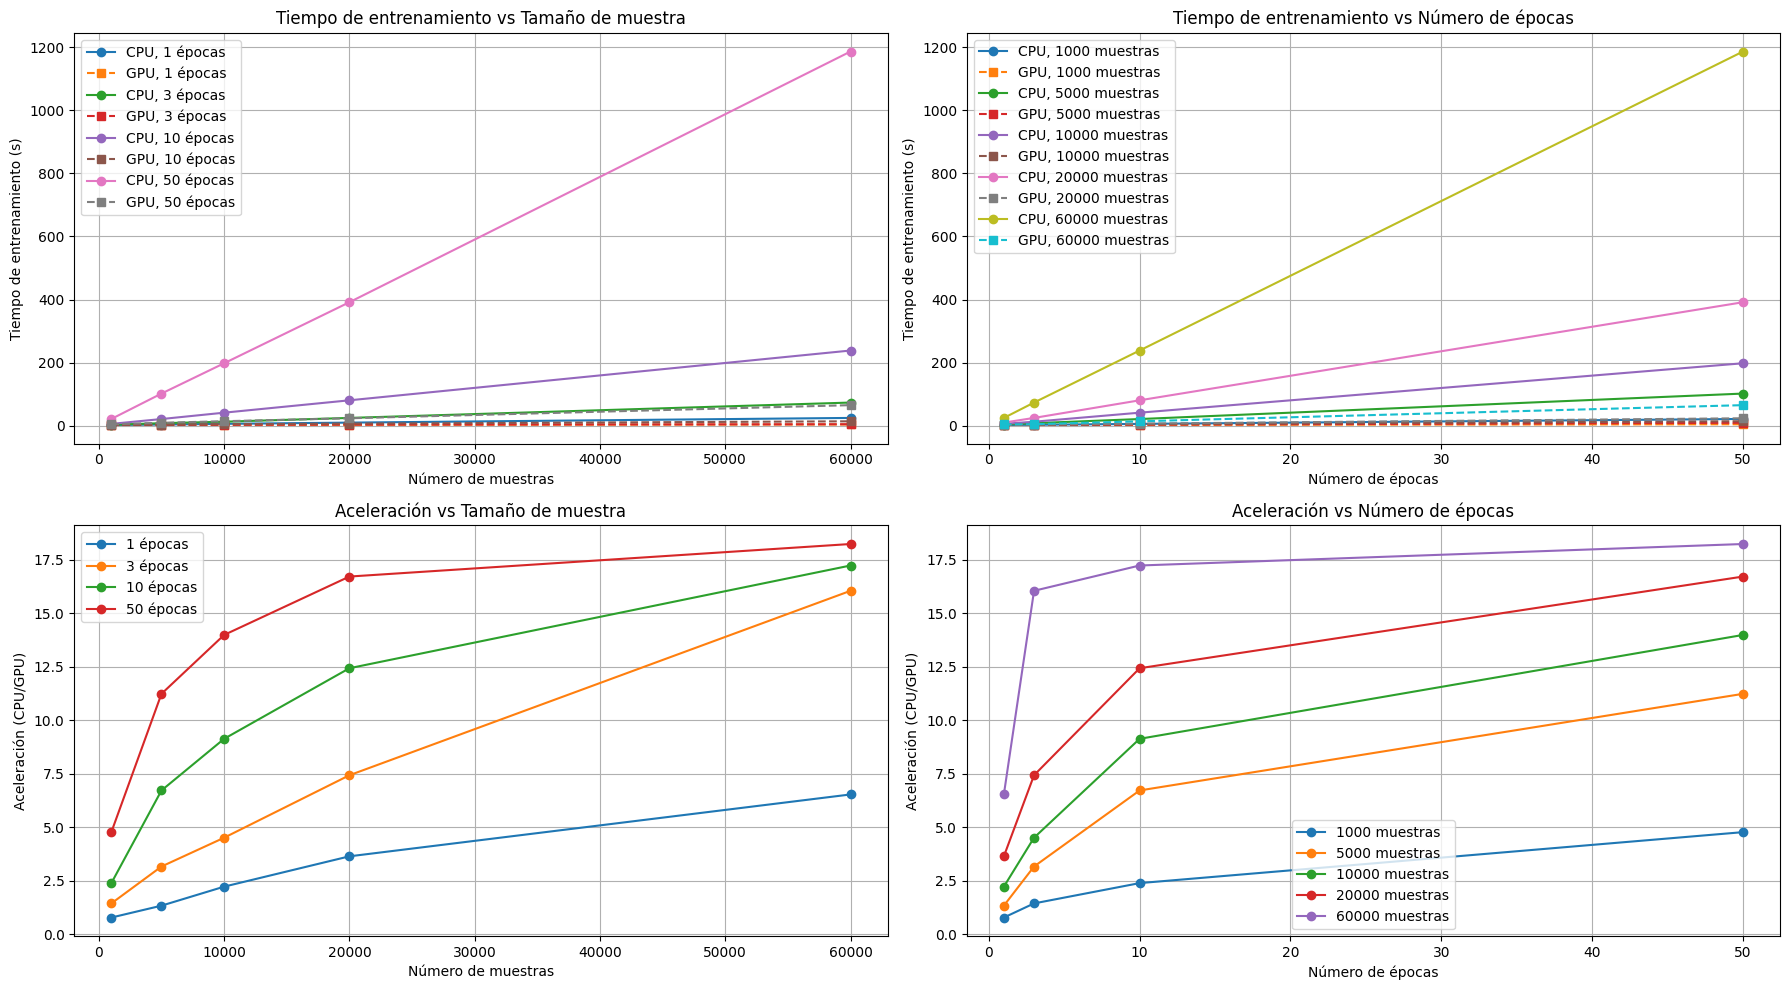


Resumen de aceleraciones (CPU/GPU):
  1000 muestras, 1 épocas: 0.79x
  1000 muestras, 3 épocas: 1.45x
  1000 muestras, 10 épocas: 2.39x
  1000 muestras, 50 épocas: 4.78x
  5000 muestras, 1 épocas: 1.34x
  5000 muestras, 3 épocas: 3.17x
  5000 muestras, 10 épocas: 6.72x
  5000 muestras, 50 épocas: 11.24x
  10000 muestras, 1 épocas: 2.23x
  10000 muestras, 3 épocas: 4.51x
  10000 muestras, 10 épocas: 9.14x
  10000 muestras, 50 épocas: 13.99x
  20000 muestras, 1 épocas: 3.65x
  20000 muestras, 3 épocas: 7.43x
  20000 muestras, 10 épocas: 12.43x
  20000 muestras, 50 épocas: 16.72x
  60000 muestras, 1 épocas: 6.54x
  60000 muestras, 3 épocas: 16.05x
  60000 muestras, 10 épocas: 17.23x
  60000 muestras, 50 épocas: 18.24x


In [1]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

# Cargar el dataset MNIST
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_full = x_train_full.reshape((-1, 28, 28, 1)).astype('float32') / 255
y_train_full = tf.keras.utils.to_categorical(y_train_full, 10)

# Parámetros para nuestros experimentos
sample_sizes = [1000, 5000, 10000, 20000, 60000]  # Diferentes tamaños de muestra
epochs_list = [1, 3, 10, 50]  # Diferentes números de épocas
batch_size = 128

# Crear modelo simple CNN
def create_simple_model():
    inputs = tf.keras.layers.Input(shape=(28, 28, 1))
    x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Función para entrenar modelo y medir tiempo
def benchmark(device_name, x_train, y_train, epochs):
    with tf.device(device_name):
        model = create_simple_model()
        start_time = time.time()
        history = model.fit(
            x_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            verbose=0  # Desactivar salida para acelerar benchmarks
        )
        end_time = time.time()
    return end_time - start_time, history.history['accuracy'][-1]

# Matrices para almacenar resultados
cpu_times = np.zeros((len(sample_sizes), len(epochs_list)))
gpu_times = np.zeros((len(sample_sizes), len(epochs_list)))
speedups = np.zeros((len(sample_sizes), len(epochs_list)))

has_gpu = len(tf.config.list_physical_devices('GPU')) > 0

# Realizar benchmarks
for i, num_samples in enumerate(sample_sizes):
    # Preparar subconjunto de datos
    x_train = x_train_full[:num_samples]
    y_train = y_train_full[:num_samples]
    
    for j, epochs in enumerate(epochs_list):
        print(f"\nEjecutando benchmark con {num_samples} muestras y {epochs} épocas")
        
        # Benchmark en CPU
        print("  CPU: ", end="")
        cpu_time, cpu_acc = benchmark('/CPU:0', x_train, y_train, epochs)
        cpu_times[i, j] = cpu_time
        print(f"{cpu_time:.2f} segundos, Precisión: {cpu_acc:.4f}")
        
        # Benchmark en GPU (si está disponible)
        if has_gpu:
            print("  GPU: ", end="")
            gpu_time, gpu_acc = benchmark('/GPU:0', x_train, y_train, epochs)
            gpu_times[i, j] = gpu_time
            speedups[i, j] = cpu_time / gpu_time
            print(f"{gpu_time:.2f} segundos, Precisión: {gpu_acc:.4f}")
            print(f"  Aceleración: {speedups[i, j]:.2f}x")
        else:
            gpu_times[i, j] = np.nan
            speedups[i, j] = np.nan

# Crear visualizaciones
plt.figure(figsize=(18, 10))

# 1. Gráfica de tiempo de entrenamiento vs tamaño de muestra (para cada número de épocas)
plt.subplot(2, 2, 1)
for j, epochs in enumerate(epochs_list):
    plt.plot(sample_sizes, cpu_times[:, j], 'o-', label=f'CPU, {epochs} épocas')
    if has_gpu:
        plt.plot(sample_sizes, gpu_times[:, j], 's--', label=f'GPU, {epochs} épocas')
plt.xlabel('Número de muestras')
plt.ylabel('Tiempo de entrenamiento (s)')
plt.title('Tiempo de entrenamiento vs Tamaño de muestra')
plt.legend()
plt.grid(True)

# 2. Gráfica de tiempo de entrenamiento vs número de épocas (para cada tamaño de muestra)
plt.subplot(2, 2, 2)
for i, samples in enumerate(sample_sizes):
    plt.plot(epochs_list, cpu_times[i, :], 'o-', label=f'CPU, {samples} muestras')
    if has_gpu:
        plt.plot(epochs_list, gpu_times[i, :], 's--', label=f'GPU, {samples} muestras')
plt.xlabel('Número de épocas')
plt.ylabel('Tiempo de entrenamiento (s)')
plt.title('Tiempo de entrenamiento vs Número de épocas')
plt.legend()
plt.grid(True)

if has_gpu:
    # 3. Gráfica de aceleración vs tamaño de muestra
    plt.subplot(2, 2, 3)
    for j, epochs in enumerate(epochs_list):
        plt.plot(sample_sizes, speedups[:, j], 'o-', label=f'{epochs} épocas')
    plt.xlabel('Número de muestras')
    plt.ylabel('Aceleración (CPU/GPU)')
    plt.title('Aceleración vs Tamaño de muestra')
    plt.legend()
    plt.grid(True)
    
    # 4. Gráfica de aceleración vs número de épocas
    plt.subplot(2, 2, 4)
    for i, samples in enumerate(sample_sizes):
        plt.plot(epochs_list, speedups[i, :], 'o-', label=f'{samples} muestras')
    plt.xlabel('Número de épocas')
    plt.ylabel('Aceleración (CPU/GPU)')
    plt.title('Aceleración vs Número de épocas')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.savefig('cpu_vs_gpu_benchmark.png', dpi=300)
plt.show()

print("\nResumen de aceleraciones (CPU/GPU):")
if has_gpu:
    for i, samples in enumerate(sample_sizes):
        for j, epochs in enumerate(epochs_list):
            print(f"  {samples} muestras, {epochs} épocas: {speedups[i, j]:.2f}x")
else:
    print("  No se detectó GPU para comparar.")

TensorFlow version: 2.19.0
Dispositivos disponibles:
  CPU: /physical_device:CPU:0
  GPU: /physical_device:GPU:0

Cargando dataset MNIST...

Ejecutando benchmarks con fixed_batch_size = 128

Ejecutando benchmarks con diferentes tamaños de muestra...
  1000 muestras: CPU: 3.85s, GPU: 2.48s, Aceleración: 1.55x
  15000 muestras: CPU: 32.08s, GPU: 3.91s, Aceleración: 8.20x
  30000 muestras: CPU: 61.70s, GPU: 5.80s, Aceleración: 10.64x
  60000 muestras: CPU: 123.76s, GPU: 7.09s, Aceleración: 17.46x

Ejecutando benchmarks con fixed_sample_size = 15000

Ejecutando benchmarks con diferentes tamaños de batch...
  batch_size=32: CPU: 31.00s, GPU: 7.75s, Aceleración: 4.00x
  batch_size=64: CPU: 29.85s, GPU: 5.32s, Aceleración: 5.61x
  batch_size=128: CPU: 31.03s, GPU: 3.62s, Aceleración: 8.56x
  batch_size=256: CPU: 27.30s, GPU: 2.94s, Aceleración: 9.29x
Advertencia: No hay suficientes datos de CPU. Esperaba 4 valores pero encontré 5
Advertencia: No hay suficientes datos de GPU. Esperaba 4 valore

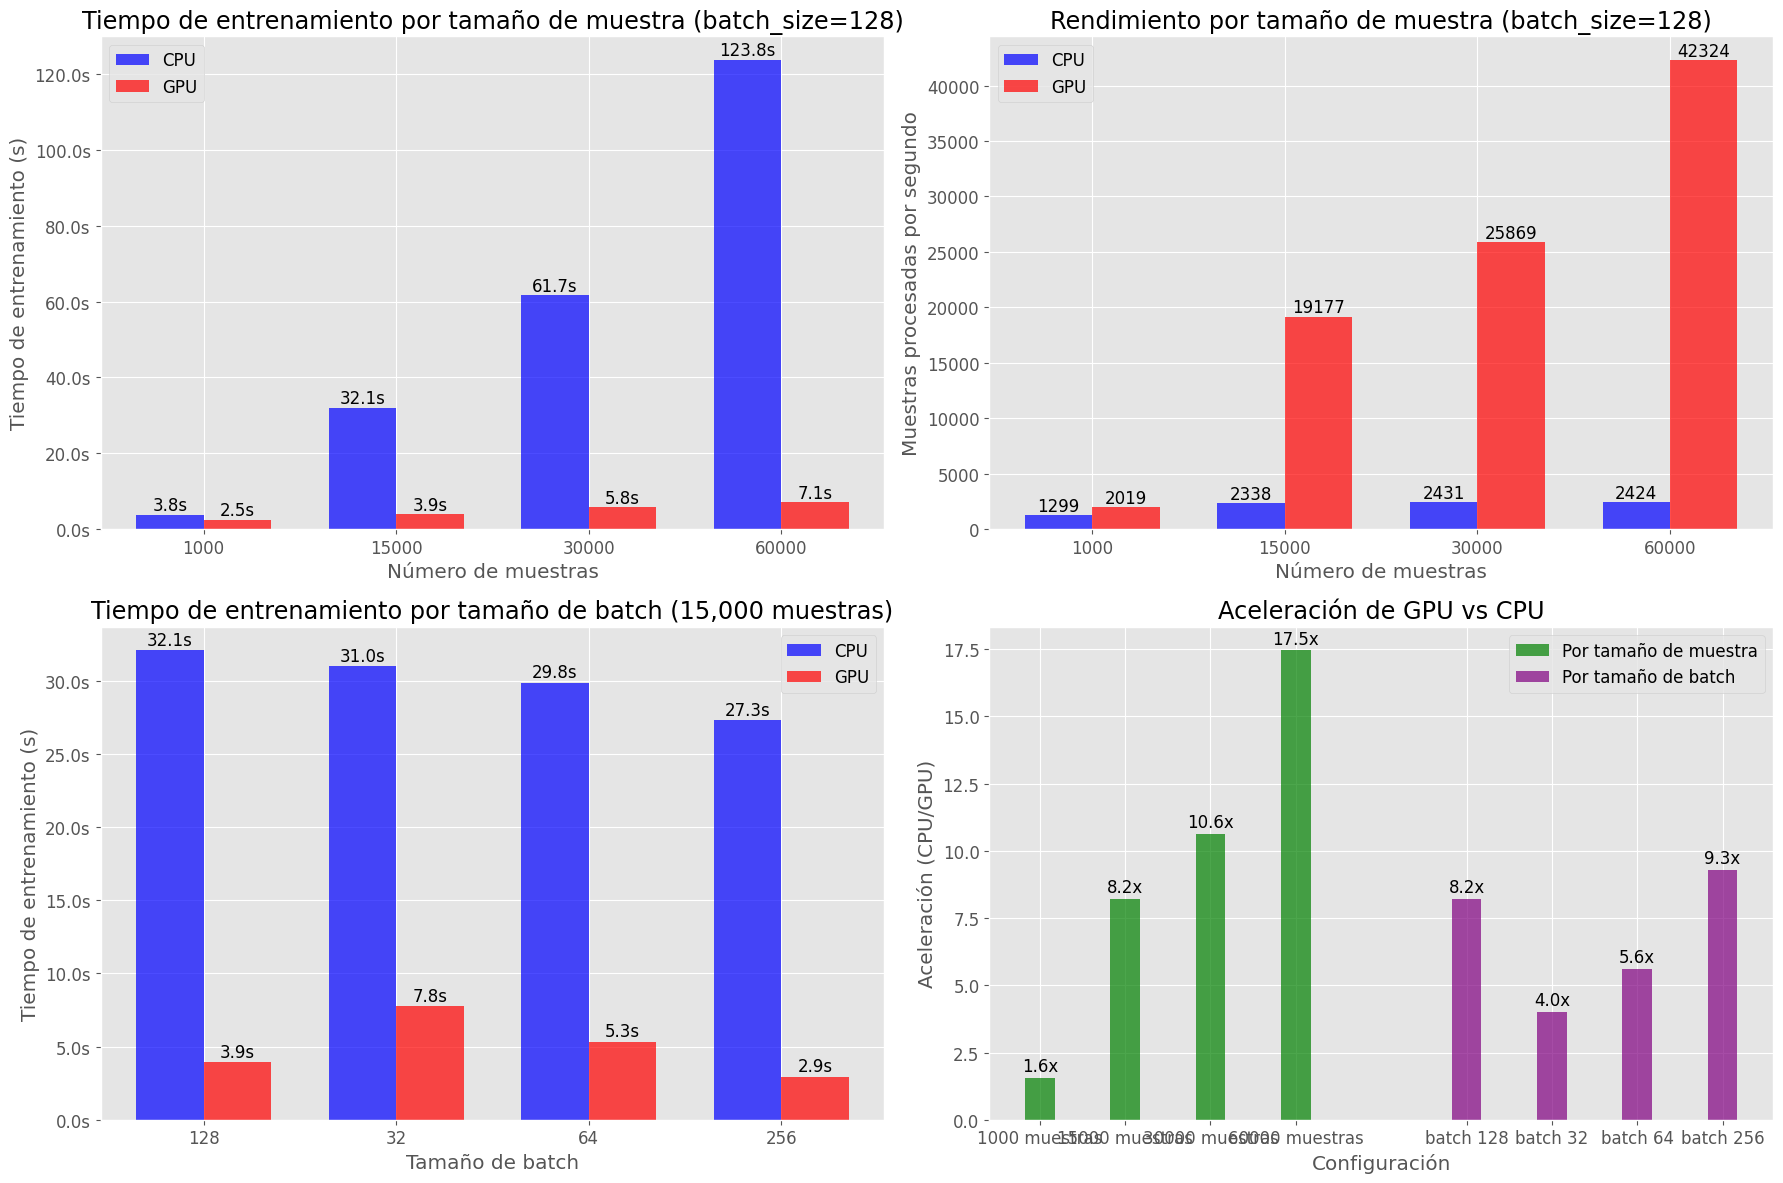


Resumen de resultados:

Aceleraciones (CPU/GPU):
  1000 muestras: 1.55x más rápido en GPU
  15000 muestras: 8.20x más rápido en GPU
  30000 muestras: 10.64x más rápido en GPU
  60000 muestras: 17.46x más rápido en GPU
  batch_size=32: 4.00x más rápido en GPU
  batch_size=64: 5.61x más rápido en GPU
  batch_size=128: 8.20x más rápido en GPU
  batch_size=256: 9.29x más rápido en GPU


: 

In [ ]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Suprimir advertencias excesivas de TensorFlow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0=DEBUG, 1=INFO, 2=WARNING, 3=ERROR

# Configurar estilo de gráficas
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

print(f"TensorFlow version: {tf.__version__}")
print("Dispositivos disponibles:")
devices = tf.config.list_physical_devices()
for device in devices:
    print(f"  {device.device_type}: {device.name}")

# Cargar dataset MNIST
print("\nCargando dataset MNIST...")
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_full = x_train_full.reshape((-1, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255
y_train_full = tf.keras.utils.to_categorical(y_train_full, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Parámetros de benchmark
sample_sizes = [1000, 15000, 30000, 60000]  # Diferentes tamaños de muestra
batch_sizes = [32, 64, 128, 256]  # Diferentes tamaños de batch
epochs = 5  # Fijamos épocas para simplificar

# Crear modelo CNN
def create_model():
    inputs = tf.keras.layers.Input(shape=(28, 28, 1))
    x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Función para entrenar y medir tiempo
def benchmark_training(device_name, x_train, y_train, batch_size):
    with tf.device(device_name):
        # Limpiar memoria de sesiones previas
        tf.keras.backend.clear_session()
        
        # Crear y entrenar modelo
        model = create_model()
        start_time = time.time()
        history = model.fit(
            x_train, y_train, 
            epochs=epochs, 
            batch_size=batch_size,
            verbose=0
        )
        train_time = time.time() - start_time
        
    return {
        'train_time': train_time,
        'samples_per_sec': len(x_train) * epochs / train_time,
        'final_accuracy': history.history['accuracy'][-1]
    }

# Función para crear gráficos de barras comparativos
def create_bar_charts(results_df):
    has_gpu = 'GPU' in results_df['device'].unique()
    
    # Formatters para mostrar números más legibles
    def time_formatter(x, pos):
        return f'{x:.1f}s'
    
    def samples_formatter(x, pos):
        if x >= 1000:
            return f'{x/1000:.1f}k'
        return f'{x:.0f}'
    
    # 1. Gráfico de barras por tamaño de muestra
    sample_data = results_df[results_df['batch_size'] == 128]
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1.1 Tiempo de entrenamiento por tamaño de muestra
    ax1 = axes[0, 0]
    samples = sample_data['samples'].unique()
    x = np.arange(len(samples))
    width = 0.35
    
    # Asegurar que los datos están ordenados por tamaño de muestra
    sample_data_sorted = sample_data.sort_values('samples')
    
    # Filtrar solo los dispositivos CPU
    cpu_data = sample_data_sorted[sample_data_sorted['device'] == 'CPU']
    cpu_times = cpu_data['train_time'].values
    
    # Verificar que tenemos datos para todas las muestras
    if len(cpu_times) != len(samples):
        print(f"Advertencia: No hay suficientes datos de CPU. Esperaba {len(samples)} valores pero encontré {len(cpu_times)}")
        # Puede ser necesario ajustar los datos o los rangos de visualización
        # Para simplificar, usaremos solo los datos disponibles
        cpu_times = np.array([cpu_data[cpu_data['samples'] == s]['train_time'].values[0] if len(cpu_data[cpu_data['samples'] == s]) > 0 else 0 for s in samples])
    
    cpu_bars = ax1.bar(x - width/2, cpu_times, width, label='CPU', color='blue', alpha=0.7)
    
    if has_gpu:
        # Filtrar solo los dispositivos GPU
        gpu_data = sample_data_sorted[sample_data_sorted['device'] == 'GPU']
        gpu_times = gpu_data['train_time'].values
        
        # Verificar que tenemos datos para todas las muestras
        if len(gpu_times) != len(samples):
            print(f"Advertencia: No hay suficientes datos de GPU. Esperaba {len(samples)} valores pero encontré {len(gpu_times)}")
            # Ajustar los datos para que coincidan con las muestras
            gpu_times = np.array([gpu_data[gpu_data['samples'] == s]['train_time'].values[0] if len(gpu_data[gpu_data['samples'] == s]) > 0 else 0 for s in samples])
        
        gpu_bars = ax1.bar(x + width/2, gpu_times, width, label='GPU', color='red', alpha=0.7)
    
    ax1.set_xlabel('Número de muestras')
    ax1.set_ylabel('Tiempo de entrenamiento (s)')
    ax1.set_title('Tiempo de entrenamiento por tamaño de muestra (batch_size=128)')
    ax1.set_xticks(x)
    ax1.set_xticklabels([f'{s}' for s in samples])
    ax1.legend()
    ax1.yaxis.set_major_formatter(FuncFormatter(time_formatter))
    
    # Añadir valores a las barras
    for i, v in enumerate(cpu_times):
        if v > 0:  # Solo añadir etiqueta si hay un valor
            ax1.text(i - width/2, v + 0.1, f'{v:.1f}s', ha='center', va='bottom')
    
    if has_gpu:
        for i, v in enumerate(gpu_times):
            if v > 0:  # Solo añadir etiqueta si hay un valor
                ax1.text(i + width/2, v + 0.1, f'{v:.1f}s', ha='center', va='bottom')
    
    # 1.2 Muestras procesadas por segundo por tamaño de muestra
    ax2 = axes[0, 1]
    
    # Ordenar y preparar datos para CPU
    cpu_samples_per_sec = np.array([cpu_data[cpu_data['samples'] == s]['samples_per_sec'].values[0] if len(cpu_data[cpu_data['samples'] == s]) > 0 else 0 for s in samples])
    cpu_bars = ax2.bar(x - width/2, cpu_samples_per_sec, width, label='CPU', color='blue', alpha=0.7)
    
    if has_gpu:
        # Ordenar y preparar datos para GPU
        gpu_samples_per_sec = np.array([gpu_data[gpu_data['samples'] == s]['samples_per_sec'].values[0] if len(gpu_data[gpu_data['samples'] == s]) > 0 else 0 for s in samples])
        gpu_bars = ax2.bar(x + width/2, gpu_samples_per_sec, width, label='GPU', color='red', alpha=0.7)
    
    ax2.set_xlabel('Número de muestras')
    ax2.set_ylabel('Muestras procesadas por segundo')
    ax2.set_title('Rendimiento por tamaño de muestra (batch_size=128)')
    ax2.set_xticks(x)
    ax2.set_xticklabels([f'{s}' for s in samples])
    ax2.legend()
    
    # Añadir valores a las barras
    for i, v in enumerate(cpu_samples_per_sec):
        if v > 0:
            ax2.text(i - width/2, v + 5, f'{v:.0f}', ha='center', va='bottom')
    
    if has_gpu:
        for i, v in enumerate(gpu_samples_per_sec):
            if v > 0:
                ax2.text(i + width/2, v + 5, f'{v:.0f}', ha='center', va='bottom')
    
    # 2. Gráfico de barras por tamaño de batch
    batch_data = results_df[results_df['samples'] == 15000]
    
    # 2.1 Tiempo de entrenamiento por tamaño de batch
    ax3 = axes[1, 0]
    batches = batch_data['batch_size'].unique()
    x = np.arange(len(batches))
    
    # Ordenar y preparar datos para CPU por tamaño de batch
    batch_data_sorted = batch_data.sort_values('batch_size')
    cpu_batch_data = batch_data_sorted[batch_data_sorted['device'] == 'CPU']
    
    # Verificar que tenemos datos para todos los tamaños de batch
    cpu_batch_times = np.array([cpu_batch_data[cpu_batch_data['batch_size'] == b]['train_time'].values[0] if len(cpu_batch_data[cpu_batch_data['batch_size'] == b]) > 0 else 0 for b in batches])
    cpu_bars = ax3.bar(x - width/2, cpu_batch_times, width, label='CPU', color='blue', alpha=0.7)
    
    if has_gpu:
        # Ordenar y preparar datos para GPU por tamaño de batch
        gpu_batch_data = batch_data_sorted[batch_data_sorted['device'] == 'GPU']
        gpu_batch_times = np.array([gpu_batch_data[gpu_batch_data['batch_size'] == b]['train_time'].values[0] if len(gpu_batch_data[gpu_batch_data['batch_size'] == b]) > 0 else 0 for b in batches])
        gpu_bars = ax3.bar(x + width/2, gpu_batch_times, width, label='GPU', color='red', alpha=0.7)
    
    ax3.set_xlabel('Tamaño de batch')
    ax3.set_ylabel('Tiempo de entrenamiento (s)')
    ax3.set_title('Tiempo de entrenamiento por tamaño de batch (15,000 muestras)')
    ax3.set_xticks(x)
    ax3.set_xticklabels([f'{b}' for b in batches])
    ax3.legend()
    ax3.yaxis.set_major_formatter(FuncFormatter(time_formatter))
    
    # Añadir valores a las barras
    for i, v in enumerate(cpu_batch_times):
        if v > 0:
            ax3.text(i - width/2, v + 0.1, f'{v:.1f}s', ha='center', va='bottom')
    
    if has_gpu:
        for i, v in enumerate(gpu_batch_times):
            if v > 0:
                ax3.text(i + width/2, v + 0.1, f'{v:.1f}s', ha='center', va='bottom')
    
    # 2.2 Aceleración GPU vs CPU (si hay GPU)
    ax4 = axes[1, 1]
    
    if has_gpu:
        # Calcular aceleración por tamaño de muestra, evitando divisiones por cero
        sample_speedups = []
        for sample in samples:
            cpu_time_row = cpu_data[cpu_data['samples'] == sample]
            gpu_time_row = gpu_data[gpu_data['samples'] == sample]
            
            if len(cpu_time_row) > 0 and len(gpu_time_row) > 0:
                cpu_time = cpu_time_row['train_time'].values[0]
                gpu_time = gpu_time_row['train_time'].values[0]
                
                if gpu_time > 0:  # Evitar división por cero
                    sample_speedups.append(cpu_time / gpu_time)
                else:
                    sample_speedups.append(0)
            else:
                sample_speedups.append(0)
        
        # Calcular aceleración por tamaño de batch, evitando divisiones por cero
        batch_speedups = []
        for batch in batches:
            cpu_time_row = cpu_batch_data[cpu_batch_data['batch_size'] == batch]
            gpu_time_row = gpu_batch_data[gpu_batch_data['batch_size'] == batch]
            
            if len(cpu_time_row) > 0 and len(gpu_time_row) > 0:
                cpu_time = cpu_time_row['train_time'].values[0]
                gpu_time = gpu_time_row['train_time'].values[0]
                
                if gpu_time > 0:  # Evitar división por cero
                    batch_speedups.append(cpu_time / gpu_time)
                else:
                    batch_speedups.append(0)
            else:
                batch_speedups.append(0)
        
        # Graficar aceleraciones
        ax4.bar(np.arange(len(samples)), sample_speedups, width, label='Por tamaño de muestra', color='green', alpha=0.7)
        ax4.bar(np.arange(len(batches)) + len(samples) + 1, batch_speedups, width, label='Por tamaño de batch', color='purple', alpha=0.7)
        
        ax4.set_xlabel('Configuración')
        ax4.set_ylabel('Aceleración (CPU/GPU)')
        ax4.set_title('Aceleración de GPU vs CPU')
        ax4.set_xticks(list(np.arange(len(samples))) + list(np.arange(len(batches)) + len(samples) + 1))
        ax4.set_xticklabels([f'{s} muestras' for s in samples] + [f'batch {b}' for b in batches])
        ax4.legend()
        
        # Añadir valores a las barras
        for i, v in enumerate(sample_speedups):
            if v > 0:
                ax4.text(i, v + 0.1, f'{v:.1f}x', ha='center', va='bottom')
        
        for i, v in enumerate(batch_speedups):
            if v > 0:
                ax4.text(i + len(samples) + 1, v + 0.1, f'{v:.1f}x', ha='center', va='bottom')
    else:
        ax4.text(0.5, 0.5, 'No se detectó GPU para la comparación', ha='center', va='center', transform=ax4.transAxes)
    
    plt.tight_layout()
    plt.savefig('cpu_vs_gpu_benchmark_barras.png', dpi=300)
    plt.show()

# Ejecutar benchmarks y recopilar resultados
results = []
has_gpu = len(tf.config.list_physical_devices('GPU')) > 0

# Benchmark con diferentes tamaños de muestra (batch fijo = 128)
fixed_batch_size = 128
print(f"\nEjecutando benchmarks con fixed_batch_size = {fixed_batch_size}")
print("\nEjecutando benchmarks con diferentes tamaños de muestra...")
for num_samples in sample_sizes:
    # Preparar subconjunto de datos
    x_train = x_train_full[:num_samples]
    y_train = y_train_full[:num_samples]
    
    print(f"  {num_samples} muestras: ", end="", flush=True)
    
    # CPU benchmark
    cpu_results = benchmark_training('/CPU:0', x_train, y_train, fixed_batch_size)
    cpu_results['device'] = 'CPU'
    cpu_results['samples'] = num_samples
    cpu_results['batch_size'] = fixed_batch_size
    results.append(cpu_results)
    
    print(f"CPU: {cpu_results['train_time']:.2f}s, ", end="", flush=True)
    
    # GPU benchmark (si está disponible)
    if has_gpu:
        gpu_results = benchmark_training('/GPU:0', x_train, y_train, fixed_batch_size)
        gpu_results['device'] = 'GPU'
        gpu_results['samples'] = num_samples
        gpu_results['batch_size'] = fixed_batch_size
        results.append(gpu_results)
        
        speedup = cpu_results['train_time'] / gpu_results['train_time']
        print(f"GPU: {gpu_results['train_time']:.2f}s, Aceleración: {speedup:.2f}x")
    else:
        print()

# Benchmark con diferentes tamaños de batch (muestra fija = 15000)
fixed_sample_size = 15000
print(f"\nEjecutando benchmarks con fixed_sample_size = {fixed_sample_size}")
print("\nEjecutando benchmarks con diferentes tamaños de batch...")
for batch_size in batch_sizes:
    # Usar un subconjunto fijo de datos
    x_train = x_train_full[:fixed_sample_size]
    y_train = y_train_full[:fixed_sample_size]
    
    print(f"  batch_size={batch_size}: ", end="", flush=True)
    
    # CPU benchmark
    cpu_results = benchmark_training('/CPU:0', x_train, y_train, batch_size)
    cpu_results['device'] = 'CPU'
    cpu_results['samples'] = fixed_sample_size
    cpu_results['batch_size'] = batch_size
    results.append(cpu_results)
    
    print(f"CPU: {cpu_results['train_time']:.2f}s, ", end="", flush=True)
    
    # GPU benchmark (si está disponible)
    if has_gpu:
        gpu_results = benchmark_training('/GPU:0', x_train, y_train, batch_size)
        gpu_results['device'] = 'GPU'
        gpu_results['samples'] = fixed_sample_size
        gpu_results['batch_size'] = batch_size
        results.append(gpu_results)
        
        speedup = cpu_results['train_time'] / gpu_results['train_time']
        print(f"GPU: {gpu_results['train_time']:.2f}s, Aceleración: {speedup:.2f}x")
    else:
        print()

# Convertir resultados a DataFrame y crear visualizaciones
results_df = pd.DataFrame(results)
create_bar_charts(results_df)

# Mostrar resumen
print("\nResumen de resultados:")
if has_gpu:
    print("\nAceleraciones (CPU/GPU):")
    for sample in sample_sizes:
        # Filtrar y asegurar que hay datos para este tamaño de muestra
        sample_data = results_df[results_df['batch_size'] == 128]
        cpu_sample = sample_data[(sample_data['device'] == 'CPU') & (sample_data['samples'] == sample)]
        gpu_sample = sample_data[(sample_data['device'] == 'GPU') & (sample_data['samples'] == sample)]
        
        if len(cpu_sample) > 0 and len(gpu_sample) > 0:
            cpu_time = cpu_sample['train_time'].values[0]
            gpu_time = gpu_sample['train_time'].values[0]
            speedup = cpu_time / gpu_time
            print(f"  {sample} muestras: {speedup:.2f}x más rápido en GPU")
        else:
            print(f"  {sample} muestras: No hay datos suficientes para calcular la aceleración")
    
    for batch in batch_sizes:
        # Filtrar y asegurar que hay datos para este tamaño de batch
        batch_data = results_df[results_df['samples'] == 15000]
        cpu_batch = batch_data[(batch_data['device'] == 'CPU') & (batch_data['batch_size'] == batch)]
        gpu_batch = batch_data[(batch_data['device'] == 'GPU') & (batch_data['batch_size'] == batch)]
        
        if len(cpu_batch) > 0 and len(gpu_batch) > 0:
            cpu_time = cpu_batch['train_time'].values[0]
            gpu_time = gpu_batch['train_time'].values[0]
            speedup = cpu_time / gpu_time
            print(f"  batch_size={batch}: {speedup:.2f}x más rápido en GPU")
        else:
            print(f"  batch_size={batch}: No hay datos suficientes para calcular la aceleración")